In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import scipy
import json
import matplotlib as mpl
import matplotlib.pyplot as plt

%run ../Scripts/trajectory.py
%run ../Scripts/trajectoryVisual.py
%run ../Scripts/trajsTree.py
%run ../Scripts/supMethods.py
%run ../Scripts/formulas.py
foldername = "../Data_Spacer_Size3"

In [32]:
foldername = "../Data_Spacer_Size3"
M_list = [1, 5, 10, 15, 20, 25, 35, 50, 60, 75, 85, 100]
seed_lizt = [0]
fitness_list = []
fitness_err_list = []
Entropy_list = []
Entropy_err_list = []

for M in M_list:
    folder = foldername + f"/M_{M}_seed0"
    params, sim_params, results = read_json(folder, True)
    single_count = np.load(folder+"/Results/counts.npy")
    fitness_list.append(np.mean(single_count[-11:-1]))
    fitness_err_list.append(results["fitness_err"])

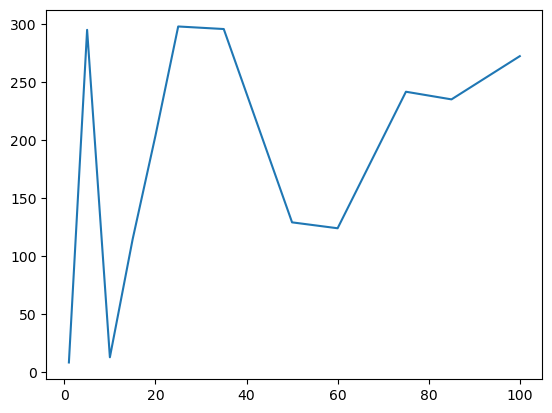

In [33]:
plt.plot(M_list, fitness_list)

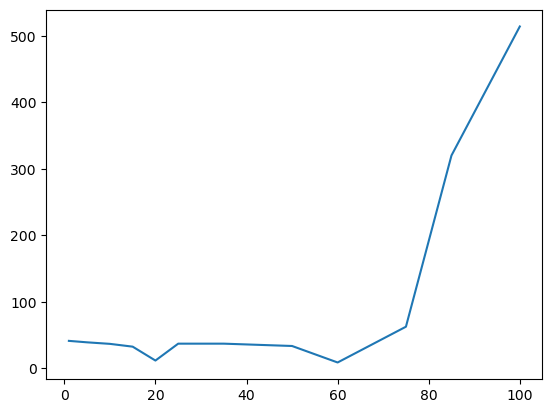

In [34]:
foldername = "../Data_Spacer_Size4"
M_list = [1, 5, 10, 15, 20, 25, 35, 50, 60, 75, 85, 100]
seed_lizt = [0]
fitness_list = []
fitness_err_list = []
Entropy_list = []
Entropy_err_list = []

for M in M_list:
    folder = foldername + f"/M_{M}_seed0"
    params, sim_params, results = read_json(folder, True)
    single_count = np.load(folder+"/Results/counts.npy")
    fitness_list.append(np.mean(single_count[-11:-1]))
    fitness_err_list.append(results["fitness_err"])

plt.plot(M_list, fitness_list)

10


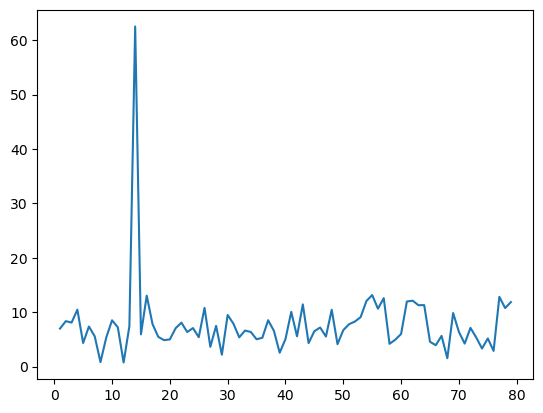

In [28]:
foldername = "../Data_Cas_Protein_Large2"
Np_list = np.arange(1, 80)
seed_lizt = [0]
fitness_list2 = []
fitness_err_list2 = []
Entropy_list2 = []
Entropy_err_list2 = []

for Np in Np_list:
    folder = foldername + f"/Np_{Np}_seed0"
    params, sim_params, results = read_json(folder, True)
    single_count = np.load(folder+"/Results/fitness.npy")
    fitness_list2.append(np.abs(np.mean(single_count[-50:-1])))

    single_count = np.load(folder+"/Results/entropy_growth.npy")
    Entropy_list2.append(np.abs(np.mean(single_count[-50:-1])))

    fitness_err_list2.append(results["fitness_err"])
    Entropy_err_list2.append(results["Entropy_m_err"])

print(params["M"])
plt.plot(Np_list, Entropy_list2)
# plt.yscale("log")

10


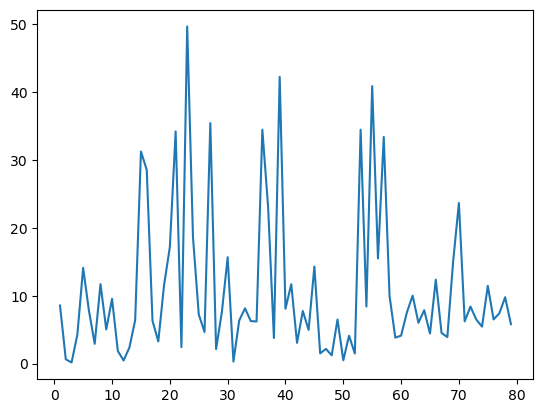

In [30]:
foldername = "../Data_Cas_Protein_Large"
Np_list = np.arange(1, 80)
seed_lizt = [0]
fitness_list = []
fitness_err_list = []
Entropy_list = []
Entropy_err_list = []

for Np in Np_list:
    folder = foldername + f"/Np_{Np}_seed0"
    params, sim_params, results = read_json(folder, True)
    
    single_count = np.load(folder+"/Results/fitness.npy")
    fitness_list.append(np.abs(np.mean(single_count[-50:-1])))

    single_count = np.load(folder+"/Results/entropy_growth.npy")
    Entropy_list.append(np.abs(np.mean(single_count[-50:-1])))

    fitness_err_list.append(results["fitness_err"])
    Entropy_err_list.append(results["Entropy_m_err"])

print(params["M"])
plt.plot(Np_list, Entropy_list)

10


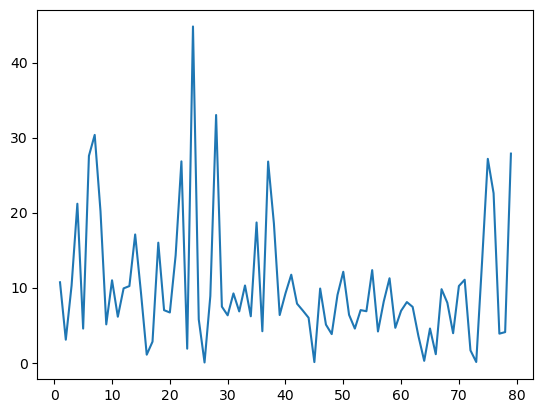

In [39]:
foldername = "../Data_Cas_Protein_Large3"
Np_list = np.arange(1, 80)
seed_lizt = [0]
fitness_list3 = []
fitness_err_list3 = []
Entropy_list3 = []
Entropy_err_list3 = []

for Np in Np_list:
    folder = foldername + f"/Np_{Np}_seed0"
    params, sim_params, results = read_json(folder, True)
    
    single_count = np.load(folder+"/Results/fitness.npy")
    fitness_list3.append(np.abs(np.mean(single_count[-50:-1])))

    single_count = np.load(folder+"/Results/entropy_growth.npy")
    Entropy_list3.append(np.abs(np.mean(single_count[-50:-1])))

    fitness_err_list3.append(results["fitness_err"])
    Entropy_err_list3.append(results["Entropy_m_err"])

print(params["M"])
plt.plot(Np_list, Entropy_list3)

Text(0.5, 1.0, 'Entroy Production during selection for $M = 10$')

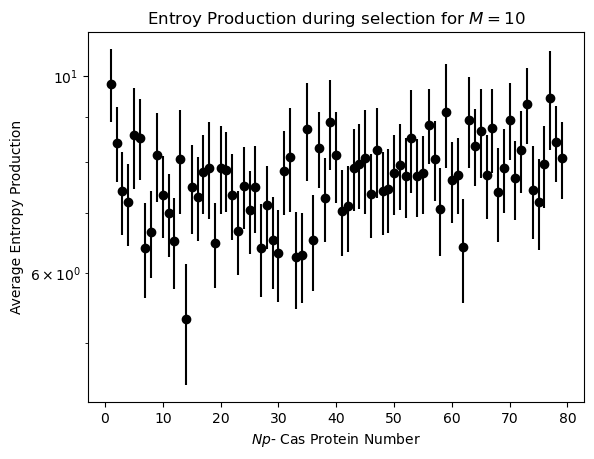

In [51]:
from matplotlib.lines import lineStyles


plt.figure()
plt.scatter(Np_list, fitness_list2, color = 'black')
plt.errorbar(Np_list, fitness_list2, yerr = np.sqrt(5*np.array(fitness_err_list2)), linestyle = 'None', color = 'black')

# plt.scatter(Np_list, fitness_list3)
# plt.errorbar(Np_list, fitness_list3, yerr = np.sqrt(5*np.array(fitness_err_list3)), linestyle = 'None')
plt.yscale("log")
plt.ylabel("Average Entropy Production")
plt.xlabel(r"$Np$-"+" Cas Protein Number")
plt.title("Entroy Production during selection for " + r"$M = 10$")